## <font color="maroon"><h4 align="center">Handling Missing Data - fillna, interpolate, dropna</font>

In [1]:
#data cleaning/data munging
import pandas as pd
df = pd.read_csv("weather_data_missing.csv")
#df = pd.read_csv("weather_data_missing.csv",index_col='day',parse_dates=['day'])
#df = pd.read_csv("weather_data_missing.csv",skiprows =3,parse_dates=['day'])
#type(df.day[0])
df


,day,temperature,windspeed,event
0,01-01-2017,32.0,6.0,Rain
1,01-04-2017,NaN,9.0,Sunny
2,01-05-2017,28.0,NaN,Snow
3,01-06-2017,NaN,7.0,NaN
4,01-07-2017,32.0,NaN,Rain
5,01-08-2017,NaN,NaN,Sunny
6,01-09-2017,NaN,NaN,NaN
7,01-10-2017,34.0,8.0,Cloudy
8,01-11-2017,40.0,12.0,Sunny
9,NaN,NaN,8.4,NaN


          day  temperature windspeed   event
0  01-01-2017         32.0         6    Rain
1  01-04-2017          NaN         9   Sunny
2  01-05-2017         28.0              Snow
3  01-06-2017          NaN         7     NaN
4  01-07-2017         32.0       NaN    Rain
5  01-08-2017          NaN       NaN   Sunny
6  01-09-2017          NaN       NaN     NaN
7  01-10-2017         34.0         8  Cloudy
8  01-11-2017         40.0        12   Sunny
9         NaN          NaN       8.4     NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          9 non-null      object 
 1   temperature  5 non-null      float64
 2   windspeed    7 non-null      object 
 3   event        7 non-null      object 
dtypes: float64(1), object(3)
memory usage: 452.0+ bytes


<Axes: >

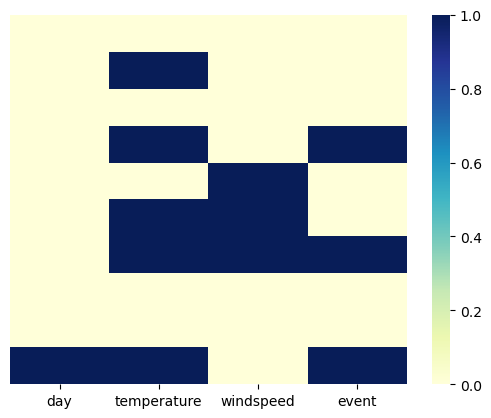

In [70]:
#df.set_index('day',inplace=True)
#df.loc["01-07-2017"]
print(df)
df.info()
#df.isnull()
import seaborn as sns
#sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")
sns.color_palette("rocket", as_cmap=True)
sns.heatmap(df.isnull(),yticklabels=False,cmap="YlGnBu")

In [29]:
#df.reset_index('day',inplace=True)
df.reset_index(inplace=True)
df
#df.info()


,day,temperature,windspeed,event
0,2017-01-01,32.0,6,Rain
1,2017-01-04,NaN,9,Sunny
2,2017-01-05,28.0,,Snow
3,2017-01-06,NaN,7,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8,Cloudy
8,2017-01-11,40.0,12,Sunny
9,NaT,NaN,8.4,NaN


## <font color="blue">fillna</font>

<font color="purple">**Fill all NaN with one specific value**</font>

In [2]:
#thresh= 2 Require that minimum 2 non-NA values.
#new_df=df.dropna(thresh=2)
#new_df = df.fillna(0)
new_df=df.dropna()
new_df
#new_df.info()

,day,temperature,windspeed,event
0,01-01-2017,32.0,6.0,Rain
7,01-10-2017,34.0,8.0,Cloudy
8,01-11-2017,40.0,12.0,Sunny


<font color="purple">**Fill na using column names and dict**</font>

In [3]:
new_df = df.fillna({
        'temperature': 0,
        'windspeed': 1,
        'event': 'No Event'
    })
new_df

,day,temperature,windspeed,event
0,01-01-2017,32.0,6.0,Rain
1,01-04-2017,0.0,9.0,Sunny
2,01-05-2017,28.0,1.0,Snow
3,01-06-2017,0.0,7.0,No Event
4,01-07-2017,32.0,1.0,Rain
5,01-08-2017,0.0,1.0,Sunny
6,01-09-2017,0.0,1.0,No Event
7,01-10-2017,34.0,8.0,Cloudy
8,01-11-2017,40.0,12.0,Sunny
9,NaN,0.0,8.4,No Event


In [4]:
new_df=df.copy()
new_df['temperature'].fillna(new_df['temperature'].mean(),inplace=True)

new_df['windspeed'].fillna(new_df['windspeed'].mean(),inplace=True)
new_df

,day,temperature,windspeed,event
0,01-01-2017,32.0,6.0,Rain
1,01-04-2017,33.2,9.0,Sunny
2,01-05-2017,28.0,8.4,Snow
3,01-06-2017,33.2,7.0,NaN
4,01-07-2017,32.0,8.4,Rain
5,01-08-2017,33.2,8.4,Sunny
6,01-09-2017,33.2,8.4,NaN
7,01-10-2017,34.0,8.0,Cloudy
8,01-11-2017,40.0,12.0,Sunny
9,NaN,33.2,8.4,NaN


<font color="purple">**Use method to determine how to fill na values**</font>

In [5]:
df
new_df = df.fillna(method="ffill") #forward fill
new_df

,day,temperature,windspeed,event
0,01-01-2017,32.0,6.0,Rain
1,01-04-2017,32.0,9.0,Sunny
2,01-05-2017,28.0,9.0,Snow
3,01-06-2017,28.0,7.0,Snow
4,01-07-2017,32.0,7.0,Rain
5,01-08-2017,32.0,7.0,Sunny
6,01-09-2017,32.0,7.0,Sunny
7,01-10-2017,34.0,8.0,Cloudy
8,01-11-2017,40.0,12.0,Sunny
9,01-11-2017,40.0,8.4,Sunny


In [6]:
#ffill on specific column
new_df=df.loc[:,'windspeed'].ffill()
new_df

0     6.0
1     9.0
2     9.0
3     7.0
4     7.0
5     7.0
6     7.0
7     8.0
8    12.0
9     8.4
Name: windspeed, dtype: float64

In [7]:
new_df = df.fillna(method="bfill")
new_df

,day,temperature,windspeed,event
0,01-01-2017,32.0,6.0,Rain
1,01-04-2017,28.0,9.0,Sunny
2,01-05-2017,28.0,7.0,Snow
3,01-06-2017,32.0,7.0,Rain
4,01-07-2017,32.0,8.0,Rain
5,01-08-2017,34.0,8.0,Sunny
6,01-09-2017,34.0,8.0,Cloudy
7,01-10-2017,34.0,8.0,Cloudy
8,01-11-2017,40.0,12.0,Sunny
9,NaN,NaN,8.4,NaN


<font color="purple">**Use of axis**</font>

In [8]:
new_df = df.fillna(method="bfill", axis="columns") # axis is either "index" or "columns"
new_df

,day,temperature,windspeed,event
0,01-01-2017,32.0,6.0,Rain
1,01-04-2017,9.0,9.0,Sunny
2,01-05-2017,28.0,Snow,Snow
3,01-06-2017,7.0,7.0,NaN
4,01-07-2017,32.0,Rain,Rain
5,01-08-2017,Sunny,Sunny,Sunny
6,01-09-2017,NaN,NaN,NaN
7,01-10-2017,34.0,8.0,Cloudy
8,01-11-2017,40.0,12.0,Sunny
9,8.4,8.4,8.4,NaN


<font color="purple">**limit parameter**</font>

In [10]:
#limit will specify how many values should get replace
new_df = df.fillna(method="ffill",limit=2)
#new_df = df.fillna(method="ffill")
new_df

,day,temperature,windspeed,event
0,01-01-2017,32.0,6.0,Rain
1,01-04-2017,32.0,9.0,Sunny
2,01-05-2017,28.0,9.0,Snow
3,01-06-2017,28.0,7.0,Snow
4,01-07-2017,32.0,7.0,Rain
5,01-08-2017,32.0,7.0,Sunny
6,01-09-2017,32.0,NaN,Sunny
7,01-10-2017,34.0,8.0,Cloudy
8,01-11-2017,40.0,12.0,Sunny
9,01-11-2017,40.0,8.4,Sunny


### <font color="blue">interpolate</font>

In [19]:
new_df = df.interpolate()
new_df

,day,temperature,windspeed,event,temperature f
0,01-01-2017,32.000000,6.00,Rain,52.000000
1,01-04-2017,30.000000,9.00,Sunny,45.000000
2,01-05-2017,28.000000,8.00,Snow,38.000000
3,01-06-2017,30.000000,7.00,NaN,45.000000
4,01-07-2017,32.000000,7.25,Rain,52.000000
5,01-08-2017,32.666667,7.50,Sunny,52.666667
6,01-09-2017,33.333333,7.75,NaN,53.333333
7,01-10-2017,34.000000,8.00,Cloudy,54.000000
8,01-11-2017,40.000000,12.00,Sunny,70.000000
9,NaN,40.000000,8.40,NaN,70.000000


In [20]:
new_df = df.interpolate() 
new_df

,day,temperature,windspeed,event,temperature f
0,01-01-2017,32.000000,6.00,Rain,52.000000
1,01-04-2017,30.000000,9.00,Sunny,45.000000
2,01-05-2017,28.000000,8.00,Snow,38.000000
3,01-06-2017,30.000000,7.00,NaN,45.000000
4,01-07-2017,32.000000,7.25,Rain,52.000000
5,01-08-2017,32.666667,7.50,Sunny,52.666667
6,01-09-2017,33.333333,7.75,NaN,53.333333
7,01-10-2017,34.000000,8.00,Cloudy,54.000000
8,01-11-2017,40.000000,12.00,Sunny,70.000000
9,NaN,40.000000,8.40,NaN,70.000000


In [13]:

df['temperature f']=df['temperature'].map(lambda x:x+10)
df




,day,temperature,windspeed,event,temperature f
0,01-01-2017,32.0,6.0,Rain,42.0
1,01-04-2017,NaN,9.0,Sunny,NaN
2,01-05-2017,28.0,NaN,Snow,38.0
3,01-06-2017,NaN,7.0,NaN,NaN
4,01-07-2017,32.0,NaN,Rain,42.0
5,01-08-2017,NaN,NaN,Sunny,NaN
6,01-09-2017,NaN,NaN,NaN,NaN
7,01-10-2017,34.0,8.0,Cloudy,44.0
8,01-11-2017,40.0,12.0,Sunny,50.0
9,NaN,NaN,8.4,NaN,NaN


In [21]:
def myconvert(num):
    if num<30:
        return num+10
    elif num>=30 and num<35:
        return num+20
    else:
        return num+30
    
df['temperature f']=df['temperature'].apply(myconvert) 
df

,day,temperature,windspeed,event,temperature f
0,01-01-2017,32.0,6.0,Rain,52.0
1,01-04-2017,NaN,9.0,Sunny,NaN
2,01-05-2017,28.0,NaN,Snow,38.0
3,01-06-2017,NaN,7.0,NaN,NaN
4,01-07-2017,32.0,NaN,Rain,52.0
5,01-08-2017,NaN,NaN,Sunny,NaN
6,01-09-2017,NaN,NaN,NaN,NaN
7,01-10-2017,34.0,8.0,Cloudy,54.0
8,01-11-2017,40.0,12.0,Sunny,70.0
9,NaN,NaN,8.4,NaN,NaN


**Notice that in above temperature on 2017-01-04 is 29 instead of 30 (in plain linear interpolate)**

**There are many other methods for interpolation such as quadratic, piecewise_polynomial, cubic etc. 
Just google "dataframe interpolate" to see complete documentation**

### <font color="blue">dropna</font>

In [15]:
new_df = df.dropna()    
new_df

,day,temperature,windspeed,event,temperature f
0,01-01-2017,32.0,6.0,Rain,52.0
7,01-10-2017,34.0,8.0,Cloudy,54.0
8,01-11-2017,40.0,12.0,Sunny,70.0


In [16]:
new_df =df .dropna(how='all')
new_df

,day,temperature,windspeed,event,temperature f
0,01-01-2017,32.0,6.0,Rain,52.0
1,01-04-2017,NaN,9.0,Sunny,NaN
2,01-05-2017,28.0,NaN,Snow,38.0
3,01-06-2017,NaN,7.0,NaN,NaN
4,01-07-2017,32.0,NaN,Rain,52.0
5,01-08-2017,NaN,NaN,Sunny,NaN
6,01-09-2017,NaN,NaN,NaN,NaN
7,01-10-2017,34.0,8.0,Cloudy,54.0
8,01-11-2017,40.0,12.0,Sunny,70.0
9,NaN,NaN,8.4,NaN,NaN


In [17]:
new_df = df.dropna(thresh=2)
new_df
#less that 2 not null values
  

,day,temperature,windspeed,event,temperature f
0,01-01-2017,32.0,6.0,Rain,52.0
1,01-04-2017,NaN,9.0,Sunny,NaN
2,01-05-2017,28.0,NaN,Snow,38.0
3,01-06-2017,NaN,7.0,NaN,NaN
4,01-07-2017,32.0,NaN,Rain,52.0
5,01-08-2017,NaN,NaN,Sunny,NaN
7,01-10-2017,34.0,8.0,Cloudy,54.0
8,01-11-2017,40.0,12.0,Sunny,70.0


### <font color="blue">Inserting Missing Dates</font>

In [18]:
dt = pd.date_range("01-01-2017","01-11-2017")
idx = pd.DatetimeIndex(dt)
df.reindex(idx)

,day,temperature,windspeed,event,temperature f
2017-01-01,NaN,NaN,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN,NaN
2017-01-07,NaN,NaN,NaN,NaN,NaN
2017-01-08,NaN,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,NaN,NaN
2017-01-10,NaN,NaN,NaN,NaN,NaN
